<a href="https://colab.research.google.com/github/yuji-sgs/Machine-Learning/blob/main/Keras_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 使用するライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
# データフレームとして、変数dfに3列×10000行のデータを格納・確認
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df

,x1,x2,y
0,0.1,0.01,3.221500e-02
1,0.2,0.01,3.141500e-02
2,0.3,0.01,2.749700e-02
3,0.4,0.01,2.300000e-02
4,0.5,0.01,1.855400e-02
...,...,...,...
9995,9.6,1.00,5.240000e-14
9996,9.7,1.00,3.690000e-14
9997,9.8,1.00,2.040000e-14
9998,9.9,1.00,8.880000e-16


In [5]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

In [6]:
# x_train, x_testではcsvファイルの1列目から2列目を，y_train, y_testでは3列目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2]]

In [8]:
# データの正規化
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [9]:
# モデルの構築
# inputの数
n_in = 2

# ノードの数
n_hidden = 16

# outputの数
n_out = 1

# 学習回数
epochs = 50
batch_size = 64

model = Sequential()
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(units=n_out))
model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 学習オプション
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/50
125/125 [==============================] - 3s 7ms/step - loss: 1.5568 - val_loss: 0.6229
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4520 - val_loss: 0.3486
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2544 - val_loss: 0.1653
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1156 - val_loss: 0.0780
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0481
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0436 - val_loss: 0.0340
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0331 - val_loss: 0.0270
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0277 - val_loss: 0.0253
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0206
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.0193

In [11]:
# 構築したモデルで予測
test_predict = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [12]:
#精度評価指標
# MAE
test_MAE = mean_absolute_error(y_test, test_predict)
print('MAE：', test_MAE)

# MSE
test_MSE = mean_squared_error(y_test, test_predict)
print('MSE：', test_MSE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test, test_predict)
print('R2：', R2)

# MAEに対するRMSEの比
print('RMSE/MAE：', test_RMSE / test_MAE)

MAE： 0.02516274870436569
MSE： 0.0015285870182277542
RMSE： 0.03909714846670732
R2： 0.998853554450836
RMSE/MAE： 1.5537709701771982


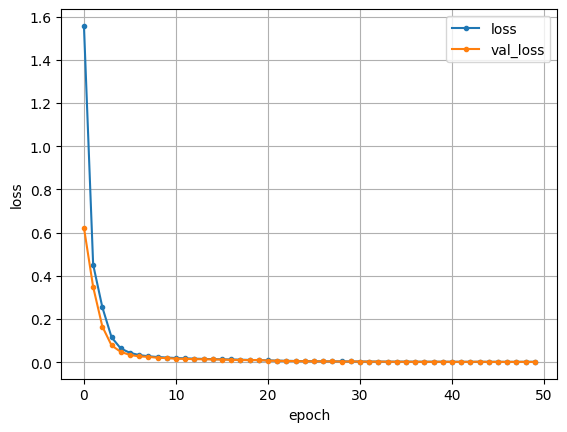

In [13]:
# 損失関数
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

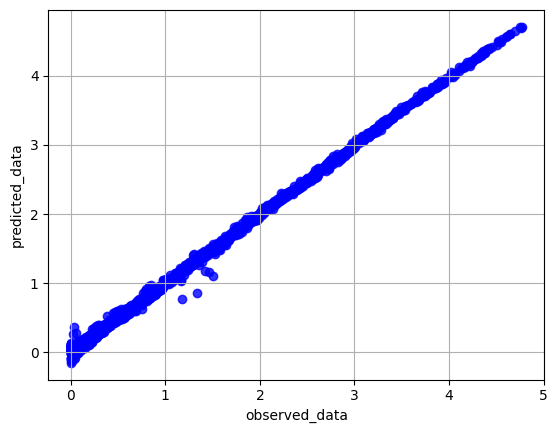

In [15]:
# Observed-Predicted Plot
plt.figure()
plt.scatter(y_test, test_predict, c='blue', alpha=0.8)
plt.ylim(plt.ylim())
plt.grid()
plt.xlabel('observed_data')
plt.ylabel('predicted_data')
plt.show()